In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## 1) Data Acquisition & Ingestion
These are the raw CSVs provided for Phase 2:
- Pavement Ratings 2022: `Syracuse_Pavement_Ratings_(2022).csv`
- Pavement Ratings 2023: `Syracuse_Ratings_Open_Data_Copy_2023_8469753568545483898.csv`
- Pavement Ratings 2024: `Syracuse_Pavement_Ratings_(2024).csv`
- Fire Hydrants: `Syracuse_Fire_Hydrants.csv`

In [5]:
# ---- Load raw datasets ----
pavement_2022_raw = pd.read_csv("Syracuse_Pavement_Ratings_(2022).csv")
pavement_2023_raw = pd.read_csv("Syracuse_Ratings_Open_Data_Copy_2023_8469753568545483898.csv")
pavement_2024_raw = pd.read_csv("Syracuse_Pavement_Ratings_(2024).csv")
hydrants_raw = pd.read_csv("Syracuse_Fire_Hydrants.csv")

datasets = {
    "pavement_2022": pavement_2022_raw,
    "pavement_2023": pavement_2023_raw,
    "pavement_2024": pavement_2024_raw,
    "hydrants": hydrants_raw
}

{ k: v.shape for k, v in datasets.items() }

{'pavement_2022': (3675, 14),
 'pavement_2023': (3675, 14),
 'pavement_2024': (3675, 14),
 'hydrants': (5625, 16)}

#### Quick schema overview (first 5 rows each)

In [ ]:
for name, df in datasets.items():
    print("\n" + "="*90)
    print(name, df.shape)
    display(df.head())


pavement_2022 (3675, 14)


,OBJECTID,BPID,STREET_NAME,FROM_STREET,TO_STREET,BLOCK,WARD,WIDTH,Rating_2022,RatingCategory,FC,CollectionDate,Miles,Shape__Length
0,1,SYR10,Academy Place,Brooklea Dr.,Norman Av.,300,13,28,8,Good,19,2022/07/20 19:27:57+00,0.071227,157.082416
1,2,SYR100,Arlington Ave.,Charmouth,Glenwood,300,13,36,5,Poor,19,2022/08/15 17:29:24+00,0.093266,205.778288
2,3,SYR1000,"Division St., E.",Carbon,Spring,800,3,33,10,Excellent,19,2022/08/16 18:12:03+00,0.059044,130.258924
3,4,SYR1002,Doll Pkwy,Carlton,Demong,100,17,22,9,Excellent,19,2022/08/17 14:08:39+00,0.197650,435.867042
4,5,SYR1004,Dorchester Ave,Wheaton,Gray,100,4,27,5,Poor,19,2022/08/03 19:20:52+00,0.087682,193.535864



pavement_2023 (3675, 14)


,FID,BPID,STREET_NAM,FROM_STREE,TO_STREET,BLOCK,WARD,WIDTH,Rating2023,RatingCate,FC,CreationDa,Miles,Shape__Length
0,1,SYR1496,Glenwood Ave.,Velasko,Dundee,1400,11,25,10,Excellent,17,8/22/2023 12:00:00 AM,0.084428,185.751118
1,2,SYR1497,Glenwood Ave.,Dundee,Austin,1500,11,25,10,Excellent,17,8/22/2023 12:00:00 AM,0.073063,160.741383
2,3,SYR2454,Monticello Dr S,Phelps Pl.,dead end,200,14,26,8,Good,19,8/21/2023 12:00:00 AM,0.157035,345.864144
3,4,SYR1498,Glenwood Ave.,Austin,Sunhill Terr.,1600,11,25,10,Excellent,17,8/22/2023 12:00:00 AM,0.057314,126.096774
4,5,SYR2455,Mooney Ave.,Teall,Hixson,100,5,25,7,Good,19,7/11/2023 12:00:00 AM,0.123751,272.250431



pavement_2024 (3675, 14)


,FID,BPID,Rating2024,StreetName,SegmentSta,SegmentEnd,Block,Ward,StreetWidt,RatingCate,FC,RatingCapt,Miles,Shape__Length
0,1,SYR10,10,Academy Place,Brooklea Dr.,Norman Av.,300,13,28,Excellent,19,2024/07/29 00:00:00+00,0.071227,157.082410
1,2,SYR100,9,Arlington Ave.,Charmouth,Glenwood,300,13,36,Excellent,19,2024/07/25 00:00:00+00,0.093266,205.778286
2,3,SYR1000,6,"Division St., E.",Carbon,Spring,800,3,33,Fair,19,2024/07/24 00:00:00+00,0.059044,130.258926
3,4,SYR1002,6,Doll Pkwy,Carlton,Demong,100,17,22,Fair,19,2024/08/05 00:00:00+00,0.197650,435.867094
4,5,SYR1004,4,Dorchester Ave,Wheaton,Gray,100,4,27,Poor,19,2024/07/25 00:00:00+00,0.087682,193.535873



hydrants (5625, 16)


,X,Y,OBJECTID,Model,Nozzle,Riser,Date_Set,Lock_on_Hydrant,GlobalID,Size_Tapped_From,Pressure_Zone,Elevation,Calc_PSI,Owner,Location,Asset_ID
0,-76.161903,43.025870,1,O.F. Wood,NaN,NaN,NaN,No,cd21aa10-e694-48bb-9640-3d3e585cbd66,12.0,Low Service,409.0,91.0,SWD,812 ONONDAGA AVE,HYD-1
1,-76.164805,43.025006,2,K-81,NaN,NaN,NaN,No,74bbf3f2-6d76-4cba-9e64-deed29719b0c,8.0,Low Service,502.0,51.0,SWD,201 PARKSIDE AVE,HYD-2
2,-76.163504,43.025218,3,O.F. Wood,NaN,NaN,NaN,No,12675cfa-c6d2-4d1d-90c3-b8cf1237e5e3,8.0,Low Service,469.0,65.0,SWD,166 PARKSIDE AVE,HYD-3
3,-76.161985,43.025252,4,USP-94,4.5,5.5,2007/07/19 00:00:00+00,No,5e629093-9995-45f6-96f7-1e50f6b4871e,8.0,Low Service,419.0,87.0,SWD,129 Parkside Ave.,HYD-4
4,-76.160754,43.025445,5,K-81,NaN,NaN,NaN,No,d2077581-a798-4135-a9db-fc6d92908a6d,12.0,Low Service,413.0,89.0,SWD,843-45 ONONDAGA AVE & BISSELL ST,HYD-5


## 2) Data Dictionary
- Column name  
- Data type  
- Missing count / percent 

In [8]:
def make_data_dictionary(df: pd.DataFrame, n_examples: int = 3) -> pd.DataFrame:
    out = pd.DataFrame({
        "column": df.columns,
        "dtype": df.dtypes.astype(str),
        "missing_count": df.isna().sum().values,
        "missing_pct": (df.isna().mean() * 100).round(2).values
    })
    # example values
    examples = []
    for c in df.columns:
        vals = df[c].dropna().astype(str).unique()[:n_examples]
        examples.append(", ".join(vals))
    out["example_values"] = examples
    out["description (fill in)"] = ""
    return out

data_dictionaries = {name: make_data_dictionary(df) for name, df in datasets.items()}

for name, dd in data_dictionaries.items():
    print("\n" + "-"*90)
    print(f"Data Dictionary: {name}")
    display(dd)


------------------------------------------------------------------------------------------
Data Dictionary: pavement_2022


,column,dtype,missing_count,missing_pct,example_values,description (fill in)
OBJECTID,OBJECTID,int64,0,0.00,"1, 2, 3",
BPID,BPID,object,0,0.00,"SYR10, SYR100, SYR1000",
STREET_NAME,STREET_NAME,object,0,0.00,"Academy Place, Arlington Ave., Division St., E.",
FROM_STREET,FROM_STREET,object,0,0.00,"Brooklea Dr., Charmouth, Carbon",
TO_STREET,TO_STREET,object,0,0.00,"Norman Av., Glenwood, Spring",
BLOCK,BLOCK,object,0,0.00,"300, 800, 100",
WARD,WARD,int64,0,0.00,"13, 3, 17",
WIDTH,WIDTH,int64,0,0.00,"28, 36, 33",
Rating_2022,Rating_2022,int64,0,0.00,"8, 5, 10",
RatingCategory,RatingCategory,object,0,0.00,"Good, Poor, Excellent",



------------------------------------------------------------------------------------------
Data Dictionary: pavement_2023


,column,dtype,missing_count,missing_pct,example_values,description (fill in)
FID,FID,int64,0,0.0,"1, 2, 3",
BPID,BPID,object,0,0.0,"SYR1496, SYR1497, SYR2454",
STREET_NAM,STREET_NAM,object,0,0.0,"Glenwood Ave., Monticello Dr S, Mooney Ave.",
FROM_STREE,FROM_STREE,object,0,0.0,"Velasko, Dundee, Phelps Pl.",
TO_STREET,TO_STREET,object,0,0.0,"Dundee, Austin, dead end",
BLOCK,BLOCK,object,0,0.0,"1400, 1500, 200",
WARD,WARD,int64,0,0.0,"11, 14, 5",
WIDTH,WIDTH,int64,0,0.0,"25, 26, 27",
Rating2023,Rating2023,int64,0,0.0,"10, 8, 7",
RatingCate,RatingCate,object,0,0.0,"Excellent, Good, Fair",



------------------------------------------------------------------------------------------
Data Dictionary: pavement_2024


,column,dtype,missing_count,missing_pct,example_values,description (fill in)
FID,FID,int64,0,0.0,"1, 2, 3",
BPID,BPID,object,0,0.0,"SYR10, SYR100, SYR1000",
Rating2024,Rating2024,int64,0,0.0,"10, 9, 6",
StreetName,StreetName,object,0,0.0,"Academy Place, Arlington Ave., Division St., E.",
SegmentSta,SegmentSta,object,0,0.0,"Brooklea Dr., Charmouth, Carbon",
SegmentEnd,SegmentEnd,object,0,0.0,"Norman Av., Glenwood, Spring",
Block,Block,object,0,0.0,"300, 800, 100",
Ward,Ward,int64,0,0.0,"13, 3, 17",
StreetWidt,StreetWidt,int64,0,0.0,"28, 36, 33",
RatingCate,RatingCate,object,0,0.0,"Excellent, Fair, Poor",



------------------------------------------------------------------------------------------
Data Dictionary: hydrants


,column,dtype,missing_count,missing_pct,example_values,description (fill in)
X,X,float64,0,0.00,"-76.1619025370106, -76.1648047027479, -76.1635...",
Y,Y,float64,0,0.00,"43.0258700200568, 43.0250063084977, 43.0252184...",
OBJECTID,OBJECTID,int64,0,0.00,"1, 2, 3",
Model,Model,object,0,0.00,"O.F. Wood, K-81, USP-94",
Nozzle,Nozzle,float64,4768,84.76,"4.5, 5.26, 5.26000022",
Riser,Riser,float64,4778,84.94,"5.5, 6.5, 6.0",
Date_Set,Date_Set,object,4321,76.82,"2007/07/19 00:00:00+00, 2006/06/28 00:00:00+00...",
Lock_on_Hydrant,Lock_on_Hydrant,object,44,0.78,"No, Yes",
GlobalID,GlobalID,object,0,0.00,"cd21aa10-e694-48bb-9640-3d3e585cbd66, 74bbf3f2...",
Size_Tapped_From,Size_Tapped_From,float64,35,0.62,"12.0, 8.0, 6.0",


## 3) Data Quality Assessment

This section covers:
1. **Missing values** (frequency, patterns, impact)  
2. **Inconsistencies** (formatting, encoding, categories)  
3. **Temporal coverage** (date fields, gaps)  
4. **Geographic coverage** (location fields completeness; neighborhood assignment planned later)

### 3.1 Missingness profiles

In [10]:
def missing_profile(df: pd.DataFrame, top_n: int = 25) -> pd.DataFrame:
    mp = pd.DataFrame({
        "missing_count": df.isna().sum(),
        "missing_pct": (df.isna().mean() * 100).round(2)
    }).sort_values(["missing_pct","missing_count"], ascending=False)
    return mp.head(top_n)

for name, df in datasets.items():
    print("\n" + "="*90)
    print(f"Missingness profile: {name}")
    display(missing_profile(df, top_n=30))


Missingness profile: pavement_2022


,missing_count,missing_pct
CollectionDate,4,0.11
OBJECTID,0,0.00
BPID,0,0.00
STREET_NAME,0,0.00
FROM_STREET,0,0.00
TO_STREET,0,0.00
BLOCK,0,0.00
WARD,0,0.00
WIDTH,0,0.00
Rating_2022,0,0.00



Missingness profile: pavement_2023


,missing_count,missing_pct
FID,0,0.0
BPID,0,0.0
STREET_NAM,0,0.0
FROM_STREE,0,0.0
TO_STREET,0,0.0
BLOCK,0,0.0
WARD,0,0.0
WIDTH,0,0.0
Rating2023,0,0.0
RatingCate,0,0.0



Missingness profile: pavement_2024


,missing_count,missing_pct
FID,0,0.0
BPID,0,0.0
Rating2024,0,0.0
StreetName,0,0.0
SegmentSta,0,0.0
SegmentEnd,0,0.0
Block,0,0.0
Ward,0,0.0
StreetWidt,0,0.0
RatingCate,0,0.0



Missingness profile: hydrants


,missing_count,missing_pct
Riser,4778,84.94
Nozzle,4768,84.76
Date_Set,4321,76.82
Pressure_Zone,50,0.89
Lock_on_Hydrant,44,0.78
Calc_PSI,41,0.73
Size_Tapped_From,35,0.62
Elevation,32,0.57
Location,22,0.39
X,0,0.00


### Visualization: Missingness (Hydrants)
Hydrants include operational fields with substantial missingness (e.g., nozzle/riser/date-set). 
We mainly need **presence and location**, so these can be excluded without harming core analysis.

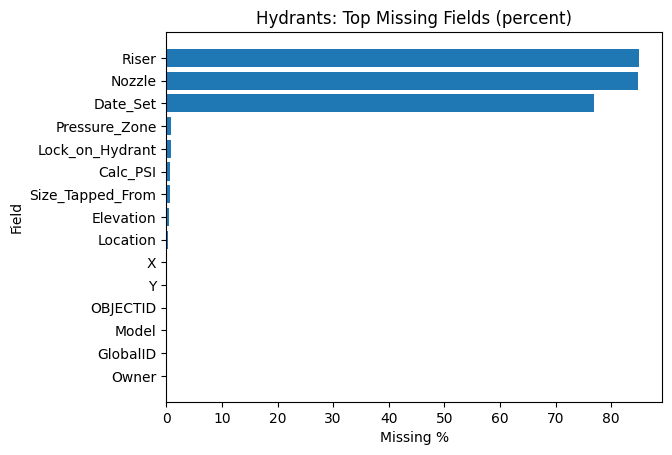

,column,missing_count,missing_pct
0,Riser,4778,84.94
1,Nozzle,4768,84.76
2,Date_Set,4321,76.82
3,Pressure_Zone,50,0.89
4,Lock_on_Hydrant,44,0.78
5,Calc_PSI,41,0.73
6,Size_Tapped_From,35,0.62
7,Elevation,32,0.57
8,Location,22,0.39
9,X,0,0.00


In [11]:
# Plot top missing fields for hydrants
mp_h = missing_profile(hydrants_raw, top_n=15).reset_index().rename(columns={"index":"column"})

plt.figure()
plt.barh(mp_h["column"][::-1], mp_h["missing_pct"][::-1])
plt.title("Hydrants: Top Missing Fields (percent)")
plt.xlabel("Missing %")
plt.ylabel("Field")
plt.show()

mp_h

### 3.2 Inconsistencies & Categorical Values
We inspect:
- Pavement `RatingCategory` (should be consistent across years)  
- Key ID fields (BPID uniqueness, duplicates)  
- Street name formatting (case, whitespace)  
- Hydrant owner/zone categorical fields

In [12]:
def value_counts_top(df, col, n=15):
    vc = df[col].astype(str).value_counts(dropna=False).head(n)
    return vc.to_frame("count")

# Pavement category distributions
for name in ["pavement_2022","pavement_2023","pavement_2024"]:
    df = datasets[name]
    if "RatingCategory" in df.columns:
        print("\n" + "-"*80)
        print(f"{name}: RatingCategory value counts")
        display(value_counts_top(df, "RatingCategory", n=20))

# Duplicate BPID checks (if available)
for name in ["pavement_2022","pavement_2023","pavement_2024"]:
    df = datasets[name]
    if "BPID" in df.columns:
        dup = df["BPID"].duplicated().sum()
        print(f"{name}: duplicated BPID rows = {dup} (out of {len(df)})")


--------------------------------------------------------------------------------
pavement_2022: RatingCategory value counts


,count
RatingCategory,
Good,1377
Excellent,934
Fair,680
Poor,653
Not Rated,31


pavement_2022: duplicated BPID rows = 0 (out of 3675)
pavement_2023: duplicated BPID rows = 0 (out of 3675)
pavement_2024: duplicated BPID rows = 0 (out of 3675)


### 3.3 Temporal Coverage

We look for date fields like `CollectionDate` and check:
- missingness
- parseability
- min/max dates (coverage window)

In [13]:
def parse_date_series(s):
    return pd.to_datetime(s, errors="coerce")

for name in ["pavement_2022","pavement_2023","pavement_2024"]:
    df = datasets[name].copy()
    date_cols = [c for c in df.columns if "Date" in c or "date" in c]
    print("\n" + "="*90)
    print(f"{name}: date-like columns -> {date_cols}")
    for c in date_cols:
        parsed = parse_date_series(df[c])
        print(f"  {c}: parseable % = {(parsed.notna().mean()*100):.2f}% | "
              f"min={parsed.min()} | max={parsed.max()} | missing={df[c].isna().sum()}")


pavement_2022: date-like columns -> ['CollectionDate']
  CollectionDate: parseable % = 99.89% | min=2022-07-14 16:15:57+00:00 | max=2022-11-10 19:58:42+00:00 | missing=4

pavement_2023: date-like columns -> []

pavement_2024: date-like columns -> []


### 3.4 Geographic Coverage

Pavement data is street-segment based and typically includes geometry length fields but may not include explicit coordinates in CSV.  
Hydrants include **X/Y coordinates** which we use as the baseline location check.

Neighborhood-level geographic completeness will be addressed after a spatial join to neighborhood boundaries.

In [14]:
# Hydrants coordinate completeness + quick sanity ranges
coord_cols = [c for c in hydrants_raw.columns if c in ["X","Y","Latitude","Longitude","LAT","LON"]]
coord_cols

['X', 'Y']

In [15]:
if "X" in hydrants_raw.columns and "Y" in hydrants_raw.columns:
    print("Hydrants X missing:", hydrants_raw["X"].isna().sum(), "of", len(hydrants_raw))
    print("Hydrants Y missing:", hydrants_raw["Y"].isna().sum(), "of", len(hydrants_raw))
    display(hydrants_raw[["X","Y"]].describe())

Hydrants X missing: 0 of 5625
Hydrants Y missing: 0 of 5625


,X,Y
count,5625.000000,5625.000000
mean,-76.143866,43.043591
std,0.025854,0.021041
min,-76.383556,42.984626
25%,-76.160228,43.030420
50%,-76.145773,43.045808
75%,-76.127163,43.059641
max,-76.077596,43.087462


### Visualization: Hydrant location scatter (quick sanity check)

This is **not** a map projection—just a coordinate scatter to confirm the points form a plausible city-shaped cluster and to spot obvious outliers.

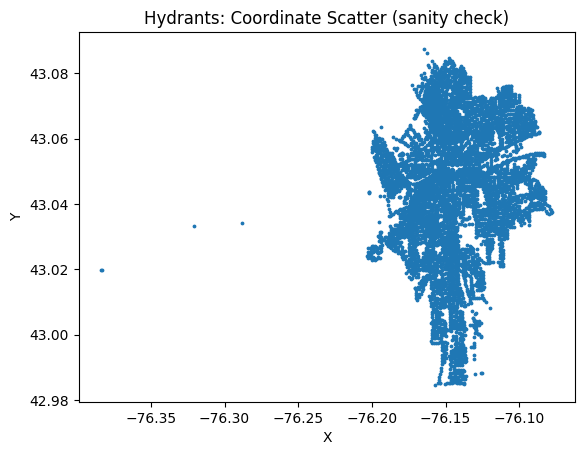

In [16]:
if "X" in hydrants_raw.columns and "Y" in hydrants_raw.columns:
    plt.figure()
    plt.scatter(hydrants_raw["X"], hydrants_raw["Y"], s=3)
    plt.title("Hydrants: Coordinate Scatter (sanity check)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

## 4) Cleaning & Standardization

Goals:
- Standardize pavement rating column to a common name: `rating`  
- Standardize year column for multi-year analysis  
- Clean key text fields (strip whitespace, consistent casing)  
- Parse dates where available  
- Hydrants: keep only fields needed for density/presence analysis (retain originals for traceability)

> Raw dataframes remain untouched (`*_raw`). Cleaned versions are created below.

In [17]:
# ---- Helper to find rating column ----
def find_rating_col(df: pd.DataFrame):
    # prefer columns that look like Rating_2022 or Rating_2024 first
    candidates = [c for c in df.columns if "Rating" in c]
    # common pattern: Rating_YYYY
    year_like = [c for c in candidates if any(ch.isdigit() for ch in c)]
    if year_like:
        return year_like[0]
    return candidates[0] if candidates else None

def clean_pavement(df: pd.DataFrame, year: int) -> pd.DataFrame:
    out = df.copy()
    rating_col = find_rating_col(out)
    out["rating"] = pd.to_numeric(out[rating_col], errors="coerce")
    out["year"] = year

    # Clean common text columns (if present)
    for c in ["STREET_NAME","FROM_STREET","TO_STREET","BLOCK"]:
        if c in out.columns:
            out[c] = out[c].astype(str).str.strip()

    # Parse date
    if "CollectionDate" in out.columns:
        out["CollectionDate_parsed"] = pd.to_datetime(out["CollectionDate"], errors="coerce")

    return out

pavement_2022 = clean_pavement(pavement_2022_raw, 2022)
pavement_2023 = clean_pavement(pavement_2023_raw, 2023)
pavement_2024 = clean_pavement(pavement_2024_raw, 2024)

# Hydrant cleaning: keep key fields, but retain raw separately
keep_h = [c for c in hydrants_raw.columns if c in ["Asset_ID","OBJECTID","X","Y","Owner","Location","Pressure_Zone","GlobalID"]]
hydrants = hydrants_raw[keep_h].copy() if keep_h else hydrants_raw.copy()

# Add parsed date if exists
if "Date_Set" in hydrants_raw.columns:
    hydrants["Date_Set_parsed"] = pd.to_datetime(hydrants_raw["Date_Set"], errors="coerce")

(pavement_2022.shape, pavement_2023.shape, pavement_2024.shape, hydrants.shape)

((3675, 17), (3675, 16), (3675, 16), (5625, 9))

## 5) Validation Checks

We validate that cleaning did not distort the data and that key assumptions hold:
- Segment counts are stable year to year  
- Ratings are numeric and within expected bounds (commonly 0–10)  
- No large unexpected increases in missing values after parsing  
- Hydrant coordinates are present for nearly all records  


In [18]:
# Segment counts
counts = pd.DataFrame({
    "year": [2022, 2023, 2024],
    "segments": [len(pavement_2022), len(pavement_2023), len(pavement_2024)],
    "rating_missing": [pavement_2022["rating"].isna().sum(),
                       pavement_2023["rating"].isna().sum(),
                       pavement_2024["rating"].isna().sum()],
    "rating_min": [pavement_2022["rating"].min(),
                   pavement_2023["rating"].min(),
                   pavement_2024["rating"].min()],
    "rating_max": [pavement_2022["rating"].max(),
                   pavement_2023["rating"].max(),
                   pavement_2024["rating"].max()],
})
counts

,year,segments,rating_missing,rating_min,rating_max
0,2022,3675,0,0,10
1,2023,3675,0,0,10
2,2024,3675,0,0,10


In [19]:
# Rating range sanity check
def rating_out_of_bounds(df, low=0, high=10):
    return df[(df["rating"] < low) | (df["rating"] > high)]

for y, df in [(2022,pavement_2022),(2023,pavement_2023),(2024,pavement_2024)]:
    oob = rating_out_of_bounds(df)
    print(f"{y}: out-of-bounds rating rows = {len(oob)}")
    if len(oob) > 0:
        display(oob[["BPID","STREET_NAME","rating"]].head(20))

2022: out-of-bounds rating rows = 0
2023: out-of-bounds rating rows = 0
2024: out-of-bounds rating rows = 0


In [21]:
# Hydrant coordinate completeness
if "X" in hydrants.columns and "Y" in hydrants.columns:
    hydrant_coord_missing = (hydrants["X"].isna() | hydrants["Y"].isna()).sum()
    hydrant_total = len(hydrants)
    hydrant_coord_missing, hydrant_total, (1 - hydrant_coord_missing/hydrant_total) * 100